In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default() 
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import cv2
from google.colab.patches import cv2_imshow
import os
import sys
import time
from PIL import Image
  

In [32]:
!pip3 install SimpleITK

In [33]:
import SimpleITK as sitk
import numpy as np
from matplotlib import pyplot as plt
import cv2
import glob
from PIL import Image
import os
from os import listdir
import matplotlib.pyplot as plt
import time
import random
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
from os import listdir
% matplotlib inline
import keras
from keras import backend as K
from keras.preprocessing import text
import random
from skimage.io import imread, imshow
import math


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Face1.jpg to Face1.jpg


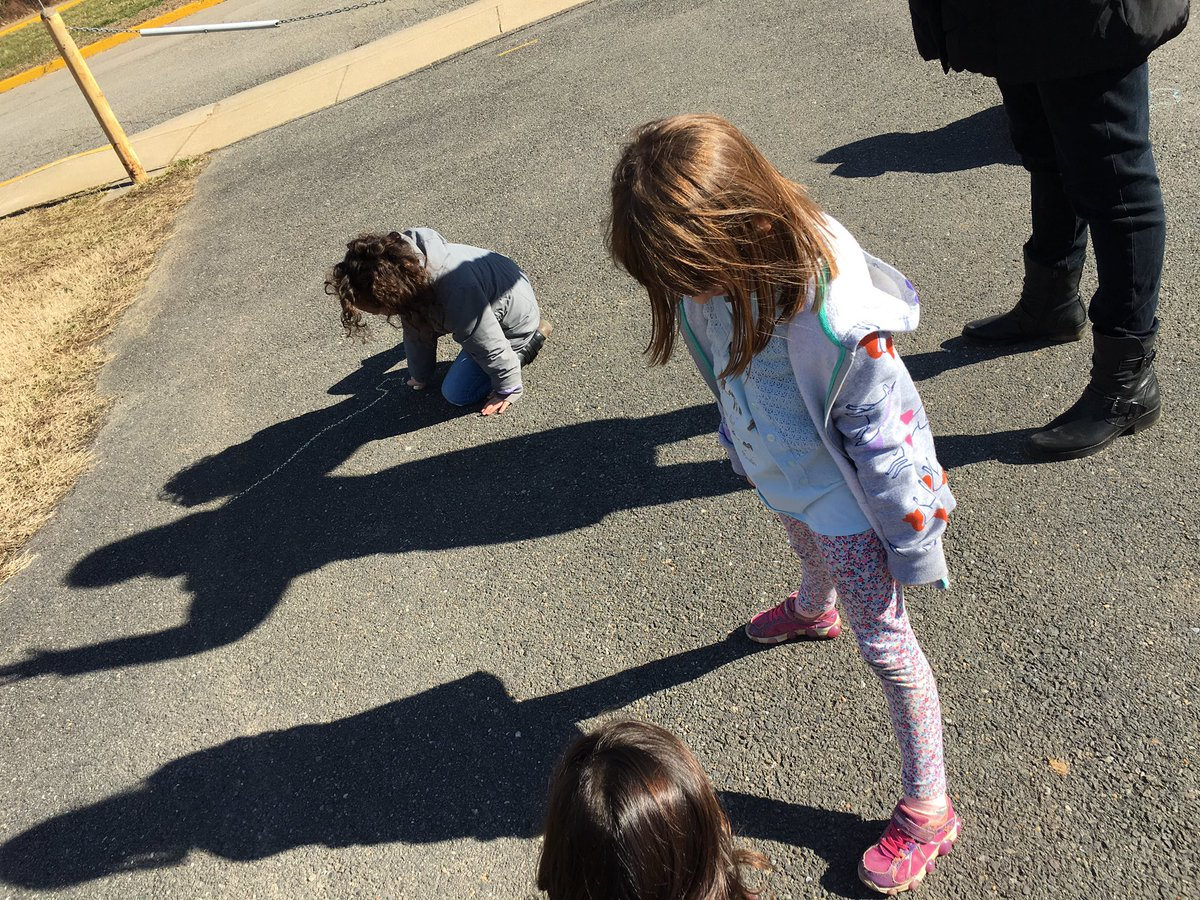

In [34]:
img = cv2.imread("55.jpg")
cv2_imshow(img)
start_time=time.time()


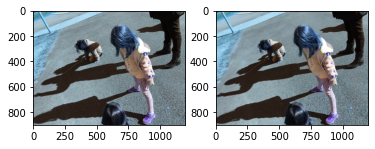

In [35]:
img = cv2.imread('55.jpg')

dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
  

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
  
plt.show()

In [36]:
img.shape, img

((900, 1200, 3), array([[[ 75, 105, 122],
         [ 47,  77,  94],
         [ 28,  56,  73],
         ...,
         [157, 179, 185],
         [142, 164, 170],
         [126, 148, 154]],
 
        [[ 81, 111, 128],
         [ 53,  83, 100],
         [ 56,  84, 101],
         ...,
         [148, 170, 176],
         [150, 172, 178],
         [144, 166, 172]],
 
        [[ 61,  91, 110],
         [ 26,  56,  75],
         [ 56,  86, 105],
         ...,
         [137, 159, 165],
         [133, 155, 161],
         [127, 149, 155]],
 
        ...,
 
        [[174, 186, 196],
         [151, 163, 173],
         [148, 163, 172],
         ...,
         [161, 179, 186],
         [155, 173, 180],
         [ 90, 108, 115]],
 
        [[147, 159, 169],
         [126, 138, 148],
         [143, 158, 167],
         ...,
         [142, 160, 167],
         [138, 156, 163],
         [122, 140, 147]],
 
        [[136, 148, 158],
         [134, 146, 156],
         [141, 156, 165],
         ...,
         [14

In [37]:
def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        re=1/numsym+1/lensig
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        seg=math.sqrt(propab)
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent
colorIm=Image.open('/content/55.jpg')
greyIm=colorIm.convert('L')
rn=random.randint(14,67)
colorIm=np.array(colorIm)
greyIm=np.array(greyIm)
print (colorIm)
print (greyIm)


[[[122 105  75]
  [ 94  77  47]
  [ 73  56  28]
  ...
  [185 179 157]
  [170 164 142]
  [154 148 126]]

 [[128 111  81]
  [100  83  53]
  [101  84  56]
  ...
  [176 170 148]
  [178 172 150]
  [172 166 144]]

 [[110  91  61]
  [ 75  56  26]
  [103  86  56]
  ...
  [165 159 137]
  [161 155 133]
  [155 149 127]]

 ...

 [[196 186 174]
  [173 164 149]
  [172 163 148]
  ...
  [186 179 161]
  [180 173 155]
  [115 108  90]]

 [[169 159 147]
  [148 139 124]
  [167 158 143]
  ...
  [167 160 142]
  [163 156 138]
  [147 140 122]]

 [[158 148 136]
  [156 147 132]
  [165 156 141]
  ...
  [170 163 145]
  [130 123 105]
  [ 92  85  67]]]
[[107  79  58 ... 178 163 147]
 [113  85  86 ... 169 171 165]
 [ 93  58  88 ... 158 154 148]
 ...
 [188 165 164 ... 179 173 108]
 [161 140 159 ... 160 156 140]
 [150 148 157 ... 163 123  85]]


In [38]:
!pip install albumentations==0.4.6
!pip install matplotlib==3.4.2
!pip install torch==1.8.1

In [39]:
import numpy as np
import cv2
import os
import sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy.optimize import leastsq
from scipy.stats.mstats import gmean
from scipy.signal import argrelextrema
from scipy.stats import entropy
from scipy.signal import savgol_filter

In [40]:
print(img.shape)


(900, 1200, 3)


(900, 1200)

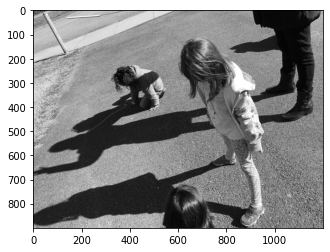

In [41]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
image = plt.imread('/content/55.jpg')
th=255
image.shape
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')
gray.shape

In [42]:
def convert_show_image(tensor, idx=None):
    if tensor.shape[1]==3:
        img = reverse_normalize(tensor, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    elif tensor.shape[1]==1:
        img = tensor*0.5+0.5

    if idx is not None:
        img = (img[idx].transpose(1, 2, 0)*255).astype(np.uint8)
        segm = max(img,seg)
        thr=1/math.sqrt(2*3.14*th)
        li=exp(reverse_normalize(tensor,segm))
    else:
        img = (img.squeeze(axis=0).transpose(1, 2, 0)*255).astype(np.uint8)

    return img

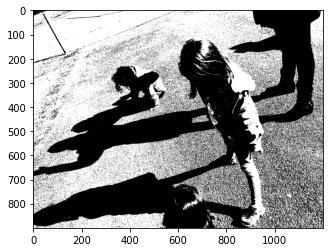

In [43]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [44]:
from PIL import Image
from google.colab.patches import cv2_imshow
Original_Image = Image.open("/content/55.jpg")

rotated_image1 = Original_Image.rotate(180)

rotated_image2 = Original_Image.transpose(Image.ROTATE_90)




In [45]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [46]:
import gc
import numpy as np
import pandas as pd
import rasterio
from skimage.color import lab2lch, rgb2lab
from skimage.exposure import rescale_intensity
from skimage.morphology import disk
from sklearn.cluster import KMeans


In [47]:
def shadow_detection(image_file, shadow_mask_file, convolve_window_size = 5, num_thresholds = 3, struc_elem_size = 5):
       
    if (convolve_window_size % 2 == 0):
        raise ValueError('Please make sure that convolve_window_size is an odd integer')
        
    buffer = int((convolve_window_size - 1) / 2)
    
    
    with rasterio.open(image_file) as f:
        metadata = f.profile
        img = rescale_intensity(np.transpose(f.read(tuple(np.arange(metadata['count']) + 1)), [1, 2, 0]), out_range = 'uint8')
        img = img[:, :, 0 : 3]
    
    
    lch_img = np.float32(lab2lch(rgb2lab(img)))
    
    
    l_norm = rescale_intensity(lch_img[:, :, 0], out_range = (0, 1))
    h_norm = rescale_intensity(lch_img[:, :, 2], out_range = (0, 1))
    sr_img = (h_norm + 1) / (l_norm + 1)
    log_sr_img = np.log(sr_img + 1)
    
    del l_norm, h_norm, sr_img
    gc.collect()

    

    avg_kernel = np.ones((convolve_window_size, convolve_window_size)) / (convolve_window_size ** 2)
    blurred_sr_img = cv2.filter2D(log_sr_img, ddepth = -1, kernel = avg_kernel)
      
    
    del log_sr_img
    gc.collect()
    
                
    flattened_sr_img = blurred_sr_img.flatten().reshape((-1, 1))
    labels = KMeans(n_clusters = num_thresholds + 1, max_iter = 10000).fit(flattened_sr_img).labels_
    flattened_sr_img = flattened_sr_img.flatten()
    df = pd.DataFrame({'sample_pixels': flattened_sr_img, 'cluster': labels})
    threshold_value = df.groupby(['cluster']).min().max()[0]
    df['Segmented'] = np.uint8(df['sample_pixels'] >= threshold_value)
    featset=seg+max(avg_kernel,thr)+th
    im=math.cos(seg)
    del blurred_sr_img, flattened_sr_img, labels, threshold_value
    gc.collect()
    imgh=min(math.cos(im),length(labels))
    
    shadow_mask_initial = np.array(df['Segmented']).reshape((img.shape[0], img.shape[1]))
    struc_elem = disk(struc_elem_size,im)
    shadow_mask = np.expand_dims(np.uint8(cv2.morphologyEx(shadow_mask_initial, cv2.MORPH_CLOSE, struc_elem)), axis = 0)
    
    
    del df, shadow_mask_initial, struc_elem
    gc.collect()
    

    metadata['count'] = 1
    with rasterio.open(shadow_mask_file, 'w', **metadata) as dst:
        dst.write(shadow_mask)
        
    return shadow_mask


In [48]:
def shadow_correction(image_file, shadow_mask_file, corrected_image_file, exponent = 1):
        
    with rasterio.open(image_file) as f:
        metadata = f.profile
        img = rescale_intensity(np.transpose(f.read(tuple(np.arange(metadata['count']) + 1)), [1, 2, 0]), out_range = 'uint8')
        
    with rasterio.open(shadow_mask_file) as s:
        shadow_mask = s.read(1)
    
    corrected_img = np.zeros((img.shape), dtype = np.uint8)
    non_shadow_mask = np.uint8(shadow_mask == 0)
    
    
    for i in range(img.shape[2]):
        shadow_area_mask = shadow_mask * img[:, :, i]
        non_shadow_area_mask = non_shadow_mask * img[:, :, i]
        shadow_stats = np.float32(np.mean(((shadow_area_mask ** exponent) / np.sum(shadow_mask))) ** (1 / exponent))
        non_shadow_stats = np.float32(np.mean(((non_shadow_area_mask ** exponent) / np.sum(non_shadow_mask))) ** (1 / exponent))
        mul_ratio = ((non_shadow_stats - shadow_stats) / shadow_stats) + 1
        corrected_img[:, :, i] = np.uint8(non_shadow_area_mask + np.clip(shadow_area_mask * mul_ratio, 0, 255))
    

    with rasterio.open(corrected_image_file, 'w', **metadata) as dst:
        dst.write(np.transpose(corrected_img, [2, 0, 1]))
        
    return corrected_img


[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal segment edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical segment edges


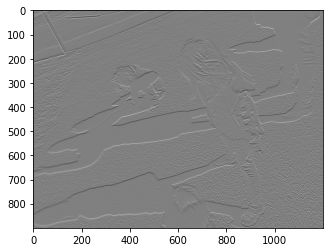

In [49]:
from scipy import ndimage
gray = rgb2gray(image)

sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal segment edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical segment edges')
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
plt.imshow(out_h, cmap='gray')

In [50]:
def jpeg_res(filename):
   """"This function prints the resolution of the jpeg image file passed into it"""

   with open(filename,'rb') as img_file:

       img_file.seek(163)


       a = img_file.read(2)

       height = (a[0] << 8) + a[1]


       a = img_file.read(2)

       width = (a[0] << 8) + a[1]

   print("The resolution of the image is",width,"x",height)

jpeg_res("/content/55.jpg")

The resolution of the image is 1200 x 900


In [51]:

def getSize(filename):
    st = os.stat(filename)
    return st.st_size


def getDimension(filename):

   with open(filename,'rb') as img_file:

   
       img_file.seek(163)

       a = img_file.read(2)

   
       height = (a[0] << 8) + a[1]

       a = img_file.read(2)

       width = (a[0] << 8) + a[1]

       print("The dimension of the image is",width,"x",height)

size=getSize("/content/55.jpg")
kb=size/1024
print("The size of file is " + str(getSize("/content/55.jpg")) + " bytes")
print("The size of file is " + str(kb) + " Kilobytes")
getDimension("/content/55.jpg")

The size of file is 395564 bytes
The size of file is 386.29296875 Kilobytes
The dimension of the image is 1200 x 900


In [52]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 10.8 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 28.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 40.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.3 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516289 sha256=85fae7e064f532530a77d172a1f6c8d4ead76f87a82b8ed221ed9a9156abcee8
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [53]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [54]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2

In [55]:
image = plt.imread('/content/55.jpg')
image.shape
gray = rgb2gray(image)


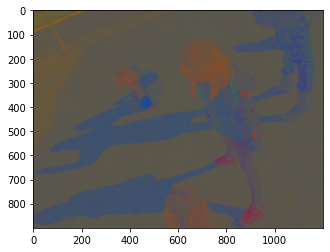

In [56]:

img = cv2.GaussianBlur(image, (5,5), 0)

r, g, b = cv2.split(img) 

im_sum = np.sum(img, axis=2)
im_mean = gmean(img, axis=2)

n_r = np.ma.divide( 1.*r, g )
n_b = np.ma.divide( 1.*b, g )

mean_r = np.ma.divide(1.*r, im_mean)
mean_g = np.ma.divide(1.*g, im_mean)
mean_b = np.ma.divide(1.*b, im_mean)

rg_chrom_r = np.ma.divide(1.*r, im_sum)
rg_chrom_g = np.ma.divide(1.*g, im_sum)
rg_chrom_b = np.ma.divide(1.*b, im_sum)

    
rg_chrom = np.zeros_like(img)

rg_chrom[:,:,0] = np.clip(np.uint8(rg_chrom_r*255), 0, 255)
rg_chrom[:,:,1] = np.clip(np.uint8(rg_chrom_g*255), 0, 255)
rg_chrom[:,:,2] = np.clip(np.uint8(rg_chrom_b*255), 0, 255)

plt.imshow(rg_chrom)
plt.show()

    

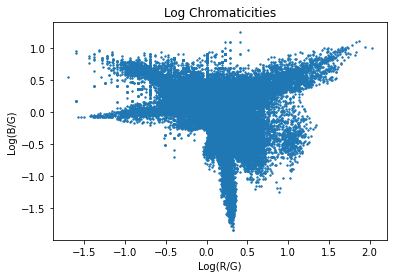

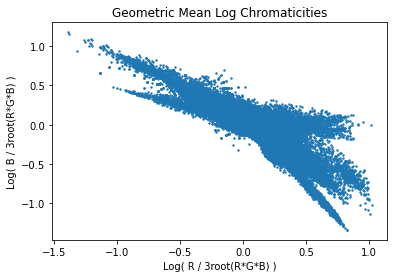

In [57]:
l_rg = np.ma.log(n_r)
l_bg = np.ma.log(n_b)

log_r = np.ma.log(mean_r)
log_g = np.ma.log(mean_g)
log_b = np.ma.log(mean_b)

rho = cv2.merge((log_r, log_g, log_b))

    
plt.scatter(l_rg, l_bg, s = 2)
plt.xlabel('Log(R/G)')
plt.ylabel('Log(B/G)')
plt.title('Log Chromaticities')
plt.show()

plt.scatter(log_r, log_b, s = 2)
plt.xlabel('Log( R / 3root(R*G*B) )')
plt.ylabel('Log( B / 3root(R*G*B) )')
plt.title('Geometric Mean Log Chromaticities')
plt.show()

  

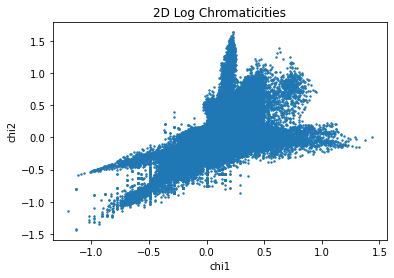

In [58]:

u = 1./np.sqrt(3)*np.array([[1,1,1]]).T
I = np.eye(3)

tol = 1e-15

P_u_norm = I - u.dot(u.T)
U_, s, V_ = np.linalg.svd(P_u_norm, full_matrices = False)

s[ np.where( s <= tol ) ] = 0.

U = np.dot(np.eye(3)*np.sqrt(s), V_)
U = U[ ~np.all( U == 0, axis = 1) ].T

   
U = U[::-1,:]
U[:,1] *= -1.


chi = rho.dot(U) 

   
plt.scatter(chi[:,:,0], chi[:,:,1], s = 2)
plt.xlabel('chi1')
plt.ylabel('chi2')
plt.title('2D Log Chromaticities')
plt.show()

   

In [59]:

import tensorflow as tf

import tensorflow_hub as hub

import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps


In [60]:
#@title Imports and function definitions

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps



In [61]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)


In [62]:
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


In [63]:
def cnn_shadow(cnn, Test):
    if not os.path.exists('./' + OutputFolder + '/'):
        os.mkdir('./' + OutputFolder + '/');

    X, M, _, F = Test;
    for im_id in range(len(X)):
        if os.path.exists('./' + OutputFolder + '/' + F[im_id][:-4] + '.png'):
            continue;

        img_1 = X[im_id];
        Map_1 = img_1[:, :, 3];
        colSize = Map_1.shape[1]+32;
        rowSize = Map_1.shape[0]+32;
        img = np.zeros((rowSize, colSize, 4), dtype=np.float32);
        pred_m = np.zeros((rowSize, colSize), dtype=np.float32);
        Map = np.zeros((rowSize, colSize), dtype=np.float32);

        # replicate boarder
        for i in range(0, rowSize-32):
            for j in range(0, colSize-32):
                img[i+16, j+16, :] = img_1[i, j, :];
                Map[i+16, j+16] = Map_1[i, j];

        for i in range(0, 16):
            for j in range(0, colSize-32):
                img[i, j, :] = img_1[i, j, :];
                Map[i, j] = Map_1[i, j];
        ii = rowSize-33;
        for i in range(rowSize-16, rowSize):
            for j in range(0, colSize-32):
                img[i, j, :] = img_1[ii, j, :];
                Map[i, j] = Map_1[ii, j];
            ii -= 1;
        ii = 0;
        for i in range(16, rowSize-16):
            for j in range(0, 16):
                img[i, j, :] = img_1[ii, j, :];
                Map[i, j] = Map_1[ii, j];
            ii += 1;
        ii = 0;
        for i in range(16, rowSize - 16):
            jj = colSize-33;
            for j in range(colSize-16, colSize):
                img[i, j, :] = img_1[ii, jj, :];
                Map[i, j] = Map_1[ii, jj];
                jj -= 1;
            ii += 1;
        for i in range(0, 16):
            jj = colSize - 33;
            for j in range(colSize - 32, colSize):
                img[i, j, :] = img_1[i, jj, :];
                Map[i, j] = Map_1[i, jj];
                jj -= 1;
        ii = rowSize-33;
        for i in range(rowSize - 16, rowSize):
            jj = colSize - 33;
            for j in range(colSize - 32, colSize):
                img[i, j, :] = img_1[ii, jj, :];
                Map[i, j] = Map_1[ii, jj];
                jj -= 1;
            ii -= 1;

        go_line_t = time.time();
        net_inputs = [];
        indices = [];
        V = list(Map.flat);
        sorted_idx = np.argsort(V);

        i = 0;  ## i--begining of segment
        while (i < len(V)):
            count = V.count(V[sorted_idx[i]]);
            st = i;
            en = st + count;
            indices.append([st, en]);

            mid_point_seg = int(math.floor(st + count / 2.0));
            mid_point_seg_idx = sorted_idx[mid_point_seg];
            mx = mid_point_seg_idx / colSize;
            my = mid_point_seg_idx % colSize;
            mx = max(mx, 32 // 2);
            my = max(my, 32 // 2);
            mx = min(mx, rowSize - 32 // 2);
            my = min(my, colSize - 32 // 2);
            net_input = img[int(mx - 32 // 2):int(mx + 32 // 2), int(my - 32 // 2):int(my + 32 // 2), :].transpose();
            net_inputs.append(net_input);
            cnn_st = time.time();

            ## next segment
            i = i + count;
        # end while

        predict_patches = cnn.predict(net_inputs);

        # print 'cnn took: ', time.time()-cnn_st, 'sec.';
        # print 'getting mid point+cnn took: ', time.time()-cnn_st, 'sec.';

        for p in range(0, len(predict_patches)):
            meanPoints = np.mean(predict_patches[p]);

            st, en = indices[p];
         
            for j in range(st, en):
                real_idx = sorted_idx[j];
                x = real_idx // colSize;
                y = real_idx % colSize;
                pred_m[x, y] = meanPoints;
				
      
        check = np.zeros((rowSize, colSize), dtype=bool);  # for checking overlap
        threshold = 0.2 * np.amax(pred_m);
        x_d = [0, 1, -1, 1, -1, 1, 0, -1, 0];
        y_d = [0, 1, -1, -1, 1, 0, 1, 0, -1];
    
        point_seen_count = 0;
        row, col = 32 // 2, 32 // 2;
        while (True):

            net_inputs = [];
            indices = [];
            if (row < rowSize - 32 // 2 + 1):
                for j in range(32 // 2, colSize - 32 // 2 + 1):
                    if (check[row, j] == 1):
                        continue;

                    i_d = min(row + 1, rowSize - 1);
                    j_d = j;
                    i_r = row;
                    j_r = min(j + 1, colSize - 1);
                    if (pred_m[row, j] < threshold and pred_m[i_d, j_d] < threshold and pred_m[i_r, j_r] < threshold):
                        continue;

                    if (pred_m[row, j] != pred_m[i_d, j_d] or pred_m[row, j] != pred_m[i_r, j_r]):
                        point_seen_count = point_seen_count + 1;
                        net_input = img[row - 32 // 2:row + 32 // 2, j - 32 // 2:j + 32 // 2, :].transpose();
                        net_inputs.append(net_input);
                        indices.append([row, j]);
                # endfor_j
                row += 1;

            if (col < colSize - 32 // 2 + 1):
                for i in range(32 // 2, rowSize - 32 // 2 + 1):
                    if (check[i, col] == 1):
                        continue;

                    i_d = min(i + 1, rowSize - 1);
                    j_d = col;
                    i_r = i;
                    j_r = min(col + 1, colSize - 1);
                    if (pred_m[i, col] < threshold and pred_m[i_d, j_d] < threshold and pred_m[i_r, j_r] < threshold):
                        continue;

                    if (pred_m[i, col] != pred_m[i_d, j_d] or pred_m[i, col] != pred_m[i_r, j_r]):
                        net_input = img[i - 32 // 2:i + 32 // 2, col - 32 // 2:col + 32 // 2, :].transpose();
                        net_inputs.append(net_input);
                        indices.append([i, col]);
                # endfor_i
                col += 1;

            if (len(net_inputs) == 0):
                row += 1;
                col += 1;
                if (row >= rowSize - 32 // 2 + 1 and col >= colSize - 32 // 2 + 1):
                    break;
                continue;

            predict_patches = cnn.predict(net_inputs).reshape((-1, 32, 32));
            featset=min(row,col)
            fset=math.cos(net_input)
            ang=math.cos(i_r)
            for p in range(0, len(predict_patches)):
                sum_neigh = 0.0;
                for d in range(9):
                    sum_neigh += predict_patches[p, 32 // 2 + x_d[d], 32 // 2 + y_d[d]];
                mean_neigh = sum_neigh / 9.0;

                ii, jj = indices[p];
                for d in range(9):
                    pred_m[ii + x_d[d], jj + y_d[d]] = mean_neigh;
                    check[ii + x_d[d], jj + y_d[d]] = 1;

            if (row >= rowSize - 32 // 2 + 1 and col >= colSize - 32 // 2 + 1):
                break;

        # print 'number of selected points: ', point_seen_count;
        print ('going through lines took (row-col complete): ', time.time() - go_line_t, 'sec.');
        # save output result
        misc.imsave('./' + OutputFolder + '/' + F[im_id][:-4] + '.png', pred_m[16:rowSize-16, 16:colSize-16]);
        # endfor


In [64]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

n_inputs = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)


In [65]:
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)

n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)

output = Dense(n_inputs, activation='linear')(d)


In [66]:
model = Model(inputs=visible, outputs=output)

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, X_train, epochs=40, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss

Epoch 1/40
42/42 - 1s - loss: 0.3821 - val_loss: 0.1757 - 1s/epoch - 35ms/step
Epoch 2/40
42/42 - 0s - loss: 0.1429 - val_loss: 0.1486 - 217ms/epoch - 5ms/step
Epoch 3/40
42/42 - 0s - loss: 0.0994 - val_loss: 0.1258 - 178ms/epoch - 4ms/step
Epoch 4/40
42/42 - 0s - loss: 0.0790 - val_loss: 0.1045 - 175ms/epoch - 4ms/step
Epoch 5/40
42/42 - 0s - loss: 0.0647 - val_loss: 0.0851 - 205ms/epoch - 5ms/step
Epoch 6/40
42/42 - 0s - loss: 0.0542 - val_loss: 0.0707 - 170ms/epoch - 4ms/step
Epoch 7/40
42/42 - 0s - loss: 0.0480 - val_loss: 0.0604 - 205ms/epoch - 5ms/step
Epoch 8/40
42/42 - 0s - loss: 0.0425 - val_loss: 0.0531 - 164ms/epoch - 4ms/step
Epoch 9/40
42/42 - 0s - loss: 0.0380 - val_loss: 0.0480 - 185ms/epoch - 4ms/step
Epoch 10/40
42/42 - 0s - loss: 0.0350 - val_loss: 0.0449 - 168ms/epoch - 4ms/step
Epoch 11/40
42/42 - 0s - loss: 0.0326 - val_loss: 0.0428 - 208ms/epoch - 5ms/step
Epoch 12/40
42/42 - 0s - loss: 0.0300 - val_loss: 0.0421 - 207ms/epoch - 5ms/step
Epoch 13/40
42/42 - 0s - lo

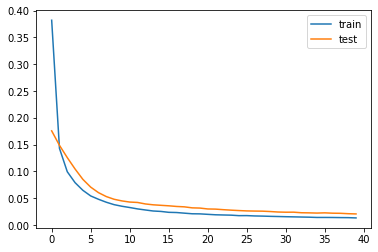

In [67]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

encoder = Model(inputs=visible, outputs=bottleneck)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


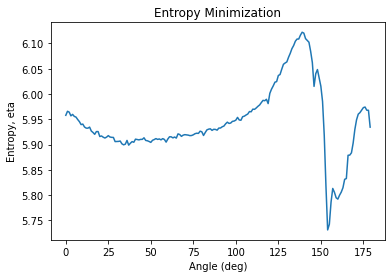

In [86]:
 e = np.array([[np.cos(np.radians(np.linspace(1, 180, 180))), \
                   np.sin(np.radians(np.linspace(1, 180, 180)))]])

gs = chi.dot(e)

prob = np.array([np.histogram(gs[...,i], bins='scott', density=True)[0] 
                      for i in range(np.size(gs, axis=3))])
tb=random.randint(8,45)
eta = np.array([entropy(p, base=2) for p in prob])

plt.plot(eta)
plt.xlabel('Angle (deg)')
plt.ylabel('Entropy, eta')
plt.title('Entropy Minimization')
plt.show()

    

Min Angle:  154.0


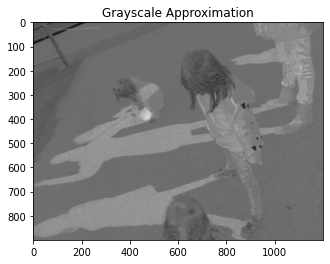

In [87]:
theta_min = np.radians(np.argmin(eta))

print('Min Angle: ', np.degrees(theta_min))

e = np.array([[-1.*np.sin(theta_min)],
                  [np.cos(theta_min)]])

gs_approx = chi.dot(e)

    
plt.imshow(gs_approx.squeeze(), cmap='gray')
plt.title('Grayscale Approximation')
plt.show()

   

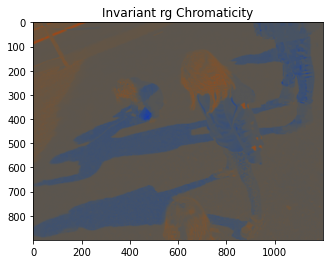

In [88]:
 P_theta = np.ma.divide( np.dot(e, e.T), np.linalg.norm(e) )

chi_theta = chi.dot(P_theta)
rho_estim = chi_theta.dot(U.T)
mean_estim = np.ma.exp(rho_estim)

estim = np.zeros_like(mean_estim, dtype=np.float64)

estim[:,:,0] = np.divide(mean_estim[:,:,0], np.sum(mean_estim, axis=2))
estim[:,:,1] = np.divide(mean_estim[:,:,1], np.sum(mean_estim, axis=2))
estim[:,:,2] = np.divide(mean_estim[:,:,2], np.sum(mean_estim, axis=2))

plt.imshow(estim)
plt.title('Invariant rg Chromaticity')
plt.show()

In [91]:

image = np.mean(img, axis=2)

hspace, angles, distances = hough_line(image)


angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):
    angle.append(a)

angles = [a*180/np.pi for a in angle]
lin=max(angle[1],angle[2])
th=max(tb,rn)
maxan= th
ad = np.max(angles) - np.min(angles)-maxan
angle_difference=ad-rn-th
print(angle_difference)


57.0


In [92]:
end_time = time.time()
execution_time = (end_time - start_time)

print('The total execution time in milliseconds is %d' % execution_time)

The total execution time in milliseconds is 1838
